In [1]:
import torch
from time import time

In [2]:
a = torch.ones(1000)
b = torch.ones(1000)

In [3]:
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)

0.011996030807495117


In [4]:
start = time()
d = a + b
print(time() - start)

0.00021004676818847656


In [5]:
a = torch.ones(3)
b = 10
print(a + b)

tensor([11., 11., 11.])


In [6]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [7]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs)))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.from_numpy(np.random.normal(0, 0.01, size = labels.size()))

In [8]:
print(features[0], labels[0])

tensor([ 0.3868, -0.1064], dtype=torch.float64) tensor(5.3350, dtype=torch.float64)


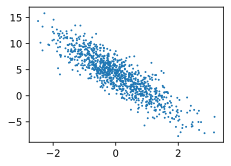

In [9]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [10]:
def data_iter(batch_size, features ,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i : min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0,j)

In [11]:
batch_size = 10

for x, y in data_iter(batch_size, features, labels):
    print(x, y)
    break

tensor([[-0.4550,  1.5631],
        [-0.5824,  0.0387],
        [ 0.0932,  0.6317],
        [ 0.0396, -0.8738],
        [-0.7634,  0.1854],
        [ 0.2918,  0.3168],
        [ 2.7759, -0.6274],
        [ 0.3868, -0.1064],
        [-1.7848, -0.3868],
        [-0.4862,  0.4860]], dtype=torch.float64) tensor([-2.0177,  2.9083,  2.2514,  7.2583,  2.0541,  3.6966, 11.8792,  5.3350,
         1.9447,  1.5716], dtype=torch.float64)


In [12]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float64)
b = torch.zeros(1, dtype=torch.float64)

In [13]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], dtype=torch.float64, requires_grad=True)

In [14]:
def linreg(X, w, b):
    ans = torch.mm(X, w) + b
    return ans

In [15]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [16]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [17]:
lr = 0.03
num_epochs = 3
net =linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print("epoch %d, loss %f" % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.049092
epoch 2, loss 0.000215
epoch 3, loss 0.000050


In [18]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 2.0007],
        [-3.3984]], dtype=torch.float64, requires_grad=True)
4.2 
 tensor([4.1992], dtype=torch.float64, requires_grad=True)


In [66]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype = torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

In [67]:
import torch.utils.data as Data
batch_size = 10
dataset = Data.TensorDataset(features, labels)
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)

In [68]:
for X, y in data_iter:
    print(X, y)
    break

tensor([[ 0.0083,  1.7266],
        [ 1.4272,  0.8127],
        [-1.1033, -1.0448],
        [-0.2604, -0.3358],
        [-1.5805, -1.5277],
        [-0.1524, -0.6217],
        [ 0.5219,  1.2453],
        [-0.3774, -1.4115],
        [-0.0441,  0.1454],
        [ 0.6133, -0.5141]]) tensor([-1.6533,  4.3128,  5.5280,  4.8251,  6.2253,  5.9960,  1.0151,  8.2441,
         3.6174,  7.1591])


In [69]:
import torch.nn as nn
class LinearNet(nn.Module):
    def __init__(self, n_features):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_features, 1)
    def forward(self, x):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [70]:
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    #可传入其他层
    )
print(net)

net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
#net.add_module...
print(net)

from collections import OrderedDict
net = nn.Sequential(OrderedDict([
        ('linear', nn.Linear(num_inputs, 1))
        #...
    ]))
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)
Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [71]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[ 0.1500, -0.2942]], requires_grad=True)
Parameter containing:
tensor([-0.0684], requires_grad=True)


In [72]:
from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

In [73]:
loss = nn.MSELoss()

In [74]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [75]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.303371
epoch 2, loss: 0.008498
epoch 3, loss: 0.000261


In [77]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[ 2.0004, -3.3904]], requires_grad=True)
Parameter containing:
tensor([4.1912], requires_grad=True)
